<a href="https://colab.research.google.com/github/shabana-sulthana123/Machine-Learning/blob/main/Copy_of_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving samplefileml.csv.csv to samplefileml.csv.csv


### Task 3: Visualize the Data
---

     Feature1   Feature2  Label
0   34.623660  78.024693      0
1   30.286711  43.894998      0
2   35.847409  72.902198      0
3   60.182599  86.308552      1
4   79.032736  75.344376      1
5   45.083277  56.316372      0
6   61.106665  96.511426      1
7   75.024746  46.554014      1
8   76.098787  87.420570      1
9   84.432820  43.533393      1
10  95.861555  38.225278      0
11  75.013658  30.603263      0
12  82.307053  76.481963      1
13  69.364589  97.718692      1
14  39.538339  76.036811      0
15  53.971052  89.207350      1
16  69.070144  52.740470      1
17  67.946855  46.678574      0
18  70.661510  92.927138      1
19  76.978784  47.575964      1
20  67.372028  42.838438      0
21  89.676776  65.799366      1
22  50.534788  48.855812      0
23  34.212061  44.209529      0
24  77.924091  68.972360      1
25  62.271014  69.954458      1
26  80.190181  44.821629      1
27  93.114389  38.800670      0
28  61.830206  50.256108      0
29  38.785804  64.995681      0
30  61.3

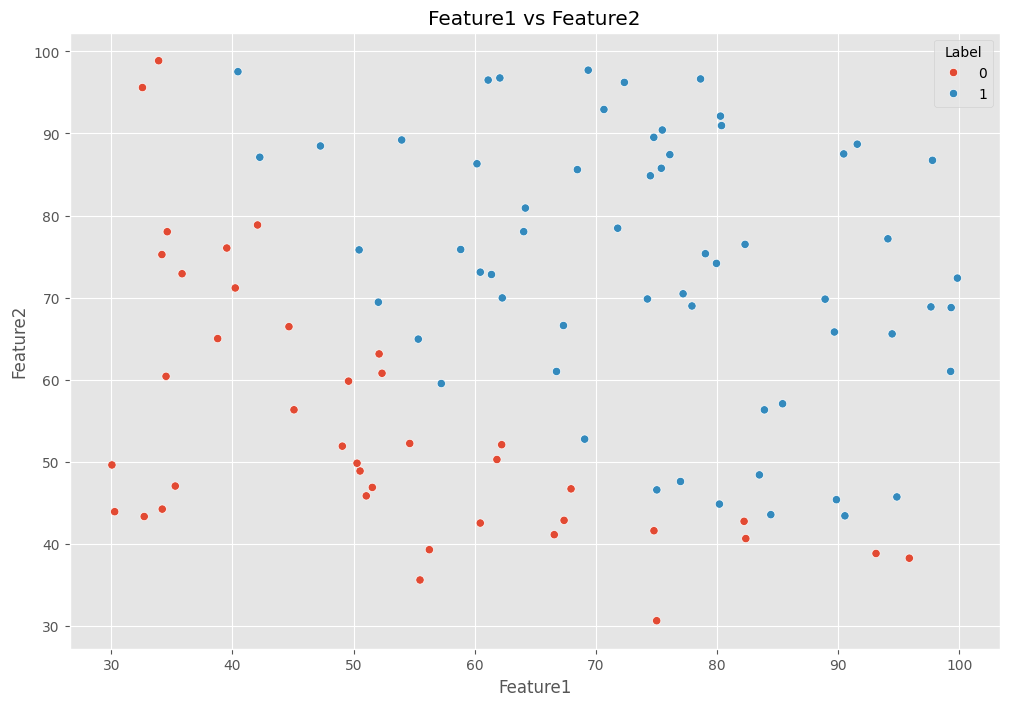

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

filename = list(uploaded.keys())[0]
data = pd.read_csv(filename, header=None, names=['Feature1', 'Feature2', 'Label'])
pd.set_option('display.max_rows', None)
print(data)
sns.scatterplot(data=data, x='Feature1', y='Feature2',hue='Label')
plt.title('Feature1 vs Feature2')
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
print(sigmoid(0))
print(sigmoid(5))


0.5
0.9933071490757153


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = -(1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    gradient = (1/m) * (X.T @ (h - y))
    return gradient


### Task 6: Cost and Gradient at Initialization
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

filename = list(uploaded.keys())[0]
data = pd.read_csv(filename, header=None, names=['Feature1', 'Feature2', 'Label'])
X = data[['Feature1', 'Feature2']].values
y = data['Label'].values.reshape(-1, 1)

m = X.shape[0]
X = np.hstack((np.ones((m, 1)), X))
theta = np.zeros((3, 1))
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = -(1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost[0, 0]

def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    gradient = (1/m) * (X.T @ (h - y))
    return gradient

initial_cost = compute_cost(X, y, theta)
initial_gradient = compute_gradient(X, y, theta)

print(f"Initial cost: {initial_cost}")
print(f"Initial gradient:\n{initial_gradient}")


Initial cost: 0.6931471805599453
Initial gradient:
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

filename = list(uploaded.keys())[0]
data = pd.read_csv(filename, header=None, names=['Feature1', 'Feature2', 'Label'])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    h = np.clip(h, 1e-10, 1 - 1e-10)  # Fix for log(0)
    cost = -(1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost[0, 0]

def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    gradient = (1/m) * (X.T @ (h - y))
    return gradient

def gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    cost_history = []

    for i in range(iterations):
        gradient = compute_gradient(X, y, theta)
        theta = theta - learning_rate * gradient
        cost = compute_cost(X, y, theta)

        if np.isnan(cost):
            print(f"NaN encountered at iteration {i}. Stopping early.")
            break

        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return theta, cost_history

learning_rate = 0.01
iterations = 1000

optimized_theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

print("Optimized theta:")
print(optimized_theta)


Iteration 0: Cost = 4.960600143399375
Iteration 100: Cost = 7.443306083669594
Iteration 200: Cost = 9.179778118186205
Iteration 300: Cost = 4.659984769620966
Iteration 400: Cost = 7.8248399822470525
Iteration 500: Cost = 9.17700805447778
Iteration 600: Cost = 4.644685636138812
Iteration 700: Cost = 7.802072876996416
Iteration 800: Cost = 9.174239752265603
Iteration 900: Cost = 4.629399314172038
Optimized theta:
[[-0.76754116]
 [ 0.35868899]
 [-0.11012487]]


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

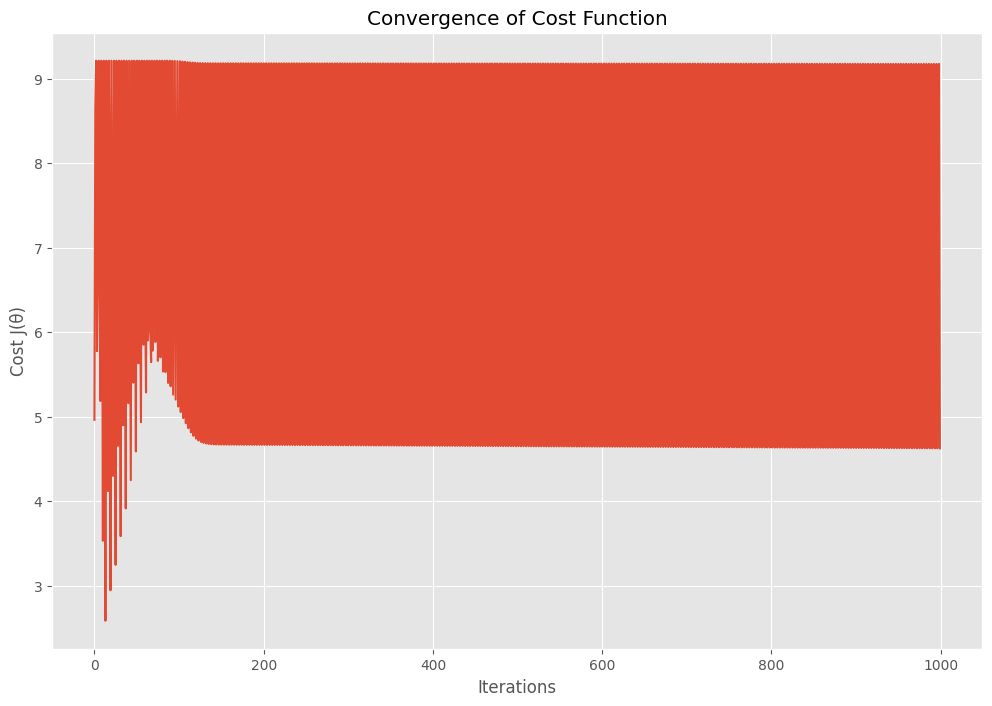

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

filename = list(uploaded.keys())[0]
data = pd.read_csv(filename, header=None, names=['Feature1', 'Feature2', 'Label'])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    h = np.clip(h, 1e-10, 1 - 1e-10)  # Fix for log(0)
    cost = -(1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost[0, 0]

def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    gradient = (1/m) * (X.T @ (h - y))
    return gradient

def gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    cost_history = []

    for i in range(iterations):
        gradient = compute_gradient(X, y, theta)
        theta = theta - learning_rate * gradient
        cost = compute_cost(X, y, theta)

        if np.isnan(cost):
            print(f"NaN encountered at iteration {i}. Stopping early.")
            break

        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return theta, cost_history
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost J(θ)')
plt.title('Convergence of Cost Function')
plt.grid(True)
plt.show()

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

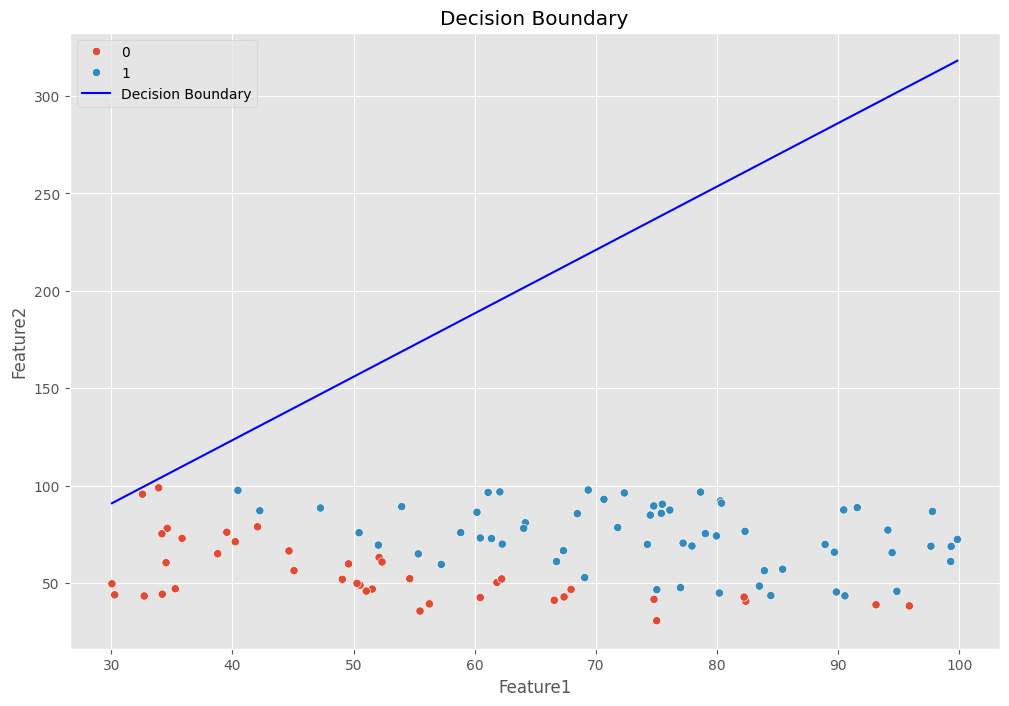

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

filename = list(uploaded.keys())[0]
data = pd.read_csv(filename, header=None, names=['Feature1', 'Feature2', 'Label'])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    h = np.clip(h, 1e-10, 1 - 1e-10)  # Fix for log(0)
    cost = -(1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost[0, 0]

def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    gradient = (1/m) * (X.T @ (h - y))
    return gradient

def gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    cost_history = []

    for i in range(iterations):
        gradient = compute_gradient(X, y, theta)
        theta = theta - learning_rate * gradient
        cost = compute_cost(X, y, theta)

        if np.isnan(cost):
            print(f"NaN encountered at iteration {i}. Stopping early.")
            break

        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return theta, cost_history
sns.scatterplot(data=data, x='Feature1', y='Feature2', hue='Label')

x_values = np.array([data['Feature1'].min(), data['Feature1'].max()])
y_values = -(optimized_theta[0] + optimized_theta[1] * x_values) / optimized_theta[2]

plt.plot(x_values, y_values, label='Decision Boundary', color='blue')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Decision Boundary')
plt.legend()
plt.show()

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

filename = list(uploaded.keys())[0]
data = pd.read_csv(filename, header=None, names=['Feature1', 'Feature2', 'Label'])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):
    probabilities = sigmoid(X @ theta)
    return (probabilities >= 0.5).astype(int)

predictions = predict(X, optimized_theta)
accuracy = np.mean(predictions == y) * 100
print(f"Training Accuracy: {accuracy:.2f}%")


Training Accuracy: 60.00%
